In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
pd.options.mode.chained_assignment = None
data = pd.read_csv('survey_results_public.csv', low_memory=False)
list = ['UndergradMajor', 'YearsCoding', 'CareerSatisfaction', 'ConvertedSalary',              
       'StackOverflowParticipate']
data = data.filter(list, axis = 1)
data = data.dropna(axis = 0)

In [3]:
def participation_to_val(x): 
    switcher = { 
        "I have never participated in Q&A on Stack Overflow": 0, 
        "Less than once per month or monthly": 1, 
        "A few times per month or weekly": 2, 
        "A few times per week": 3,
        "Daily or almost daily": 4,
        "Multiple times per day": 5
    } 
    return switcher.get(x, "error")

In [4]:
def satisfaction_to_val(x):
    switcher = {
        "Extremely dissatisfied": 1,
        "Moderately dissatisfied": 2,
        "Slightly dissatisfied": 3,
        "Neither satisfied nor dissatisfied": 4,
        "Slightly satisfied": 5,
        "Moderately satisfied": 6,
        "Extremely satisfied": 7
    }
    return switcher.get(x, "error")

In [5]:
def years_to_val(x): 
    switcher = { 
        "0-2 years" : 1,
        "3-5 years" : 4,
        "6-8 years" : 7,
        "9-11 years": 10, 
        "12-14 years": 13, 
        "15-17 years": 16, 
        "18-20 years": 19,
        "21-23 years": 22,
        "24-26 years": 25,
        "27-29 years": 28,
        "30 or more years": 30
    } 
    return switcher.get(x, "error")

In [6]:
def draw_line_graph(cs_x, ncs_x, cs_y, ncs_y, y_label, title):
    plt.plot(ncs_x, ncs_y, 'r-', label='NON-CS Major')
    plt.plot(cs_x, cs_y, 'b-', label='CS Major')
    plt.title(title)
    plt.xlabel('Years of coding')
    plt.ylabel(y_label)
    plt.yticks([])
    plt.legend()

In [7]:
def draw_histogram(cs_x, ncs_x, cs_y, ncs_y):
    plt.figure(figsize = (20,5))
    plt.subplot(1, 2, 1)
    plt.bar(np.arange(len(cs_x)), cs_y, color = 'b')
    plt.title("CS Major")
    plt.xticks(np.arange(len(cs_x)), cs_x)
    plt.yticks([])
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(len(ncs_x)), ncs_y, color = 'r')
    plt.title("NON CS Major")
    plt.xticks(np.arange(len(ncs_x)), ncs_x)
    plt.yticks([])
    plt.show()

In [8]:
def print_p_values(cs, ncs):
    cs_normt_p_val = stats.normaltest(cs).pvalue
    ncs_normt_p_val = stats.normaltest(ncs).pvalue
    levene_p_val = stats.levene(cs, ncs).pvalue
    ttest_p_val = stats.ttest_ind(cs, ncs).pvalue
    mann_p_val = stats.mannwhitneyu(cs, ncs).pvalue

    print(f"CS Major normaltest p-value : {cs_normt_p_val:.3g}")
    print(f"NON-CS Major normaltest p-value : {ncs_normt_p_val:.3g}")
    print(f"levene test p-value : {levene_p_val:.3g}")
    print(f"ttest p-value : {ttest_p_val:.3g}")
    print(f"Mann–Whitney U-test p-value: {mann_p_val:.3g}")

In [9]:
data['YearsCoding_val'] = data['YearsCoding'].apply(years_to_val)
data['AnnualSalary'] = data['ConvertedSalary']
data['Satisfaction_val'] = data['CareerSatisfaction'].apply(satisfaction_to_val)
data['StackOverflowParticipate_val'] = data['StackOverflowParticipate'].apply(participation_to_val)

data_mod = data[['Satisfaction_val','AnnualSalary', 'StackOverflowParticipate_val','YearsCoding_val','UndergradMajor']]
data_mod = data_mod.sort_values("YearsCoding_val", ascending = True)

cs_major = data_mod[data_mod['UndergradMajor'].str.contains('Computer')]
non_cs_major = data_mod[~data_mod['UndergradMajor'].str.contains('Computer')]

cs_major_copy = cs_major
non_cs_major_copy = non_cs_major

data_mod = data_mod.groupby(['YearsCoding_val']).mean()
cs_major = cs_major.groupby(['YearsCoding_val']).mean()
non_cs_major = non_cs_major.groupby(['YearsCoding_val']).mean()

### Participation

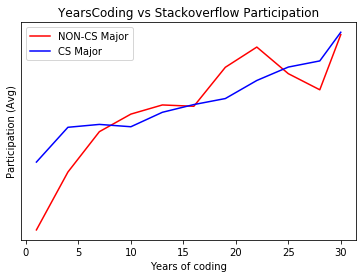

In [10]:
draw_line_graph(
    cs_major.index,
    non_cs_major.index,
    cs_major.StackOverflowParticipate_val,
    non_cs_major.StackOverflowParticipate_val,
    'Participation (Avg)',
    'YearsCoding vs Stackoverflow Participation'
)

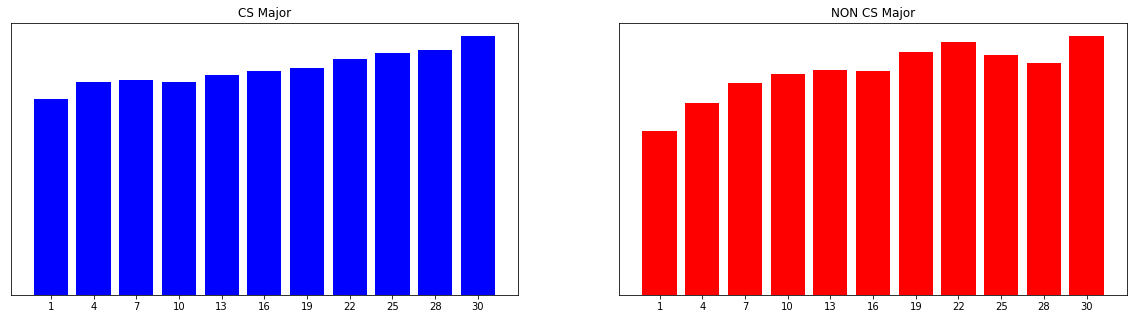

CS Major normaltest p-value : 0.919
NON-CS Major normaltest p-value : 0.178
levene test p-value : 0.388
ttest p-value : 0.742
Mann–Whitney U-test p-value: 0.448


In [19]:
draw_histogram(
    cs_major.index, 
    non_cs_major.index, 
    cs_major.StackOverflowParticipate_val, 
    non_cs_major.StackOverflowParticipate_val
)

print_p_values(cs_major.StackOverflowParticipate_val, non_cs_major.StackOverflowParticipate_val)

### Salary

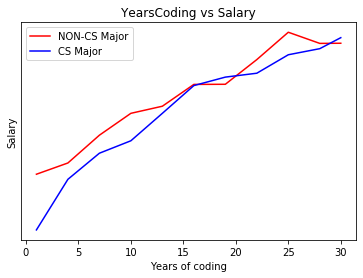

In [12]:
draw_line_graph(
    cs_major.index,
    non_cs_major.index,
    cs_major.AnnualSalary,
    non_cs_major.AnnualSalary,
    'Salary',
    'YearsCoding vs Salary'
)

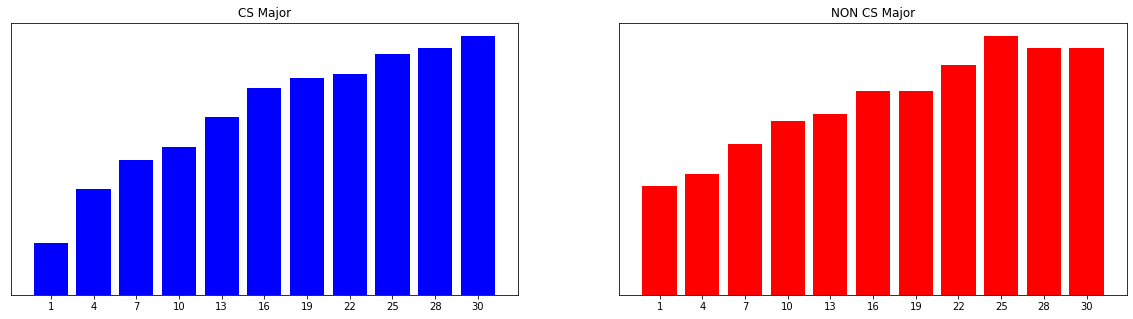

CS Major normaltest p-value : 0.475
NON-CS Major normaltest p-value : 0.573
levene test p-value : 0.576
ttest p-value : 0.557
Mann–Whitney U-test p-value: 0.3


In [13]:
draw_histogram(
    cs_major.index, 
    non_cs_major.index, 
    cs_major.AnnualSalary, 
    non_cs_major.AnnualSalary
)

print_p_values(cs_major.AnnualSalary, non_cs_major.AnnualSalary)

### Job Satisfaction

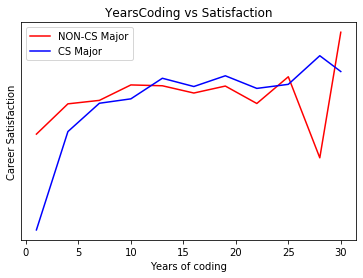

In [14]:
draw_line_graph(
    cs_major.index,
    non_cs_major.index,
    cs_major.Satisfaction_val,
    non_cs_major.Satisfaction_val,
    'Career Satisfaction',
    'YearsCoding vs Satisfaction'
)

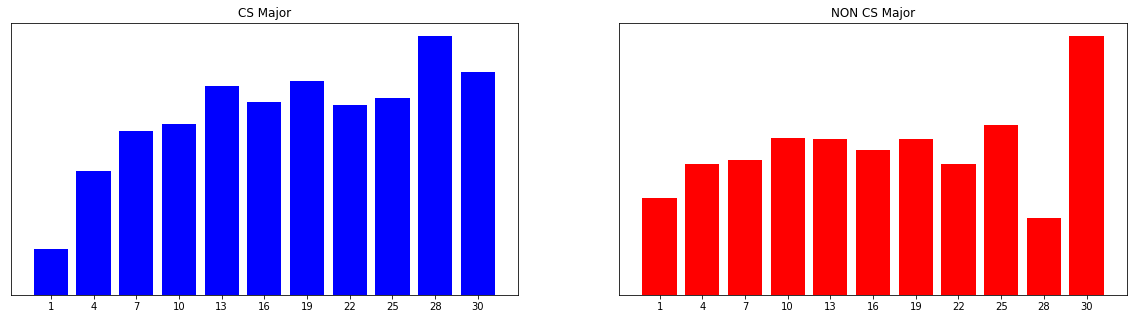

CS Major normaltest p-value : 0.0245
NON-CS Major normaltest p-value : 0.0248
levene test p-value : 0.998
ttest p-value : 0.932
Mann–Whitney U-test p-value: 0.256


In [15]:
exponent = 16 #exponential transform
cs_satisfaction = cs_major.Satisfaction_val ** exponent
non_cs_satisfaction = non_cs_major.Satisfaction_val ** exponent

draw_histogram(
    cs_major.index, 
    non_cs_major.index, 
    cs_satisfaction, 
    non_cs_satisfaction
)

print_p_values(cs_satisfaction, non_cs_satisfaction)

### Classification

In [16]:
concated = shuffle(pd.concat([cs_major_copy, non_cs_major_copy]))
concated.UndergradMajor.loc[concated.UndergradMajor.str.contains('Computer')] = 1
concated.UndergradMajor.loc[concated.UndergradMajor != 1] = 0
X = concated['AnnualSalary'].values.reshape(-1, 1)
y = concated.UndergradMajor

X_train, X_valid, y_train, y_valid = train_test_split(X,y)
scores = pd.DataFrame(columns=['depth','train','valid'])

for x in range(2,100,10):
    model = make_pipeline(
        MinMaxScaler(),
        #GaussianNB()
        DecisionTreeClassifier(max_depth=x)
    )
    model.fit(X_train, y_train)
    train = model.score(X_train, y_train)
    valid = model.score(X_valid, y_valid)
    scores = scores.append(pd.to_numeric(pd.Series([x,train, valid], index=['depth','train','valid'])), ignore_index=True)
    

###### GaussianNB:
train : 0.6388060800117773

valid : 0.6322587767719143



###### DecisionTreeClassifier:

In [17]:
scores

,depth,train,valid
0,2.0,0.636046,0.640539
1,12.0,0.645762,0.629940
2,22.0,0.669648,0.615368
3,32.0,0.696294,0.596379
4,42.0,0.706305,0.589755
5,52.0,0.706673,0.589865
6,62.0,0.706673,0.589865
7,72.0,0.706673,0.589865
8,82.0,0.706673,0.589865
9,92.0,0.706673,0.589865
